In [80]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
# CLEANED DATA 
df = pd.read_csv( "data/cleaned/cleaned_data.csv")

# TEXT LENGTH SATISTIC

In [82]:
stats = df["word_count"].describe()
print( stats )

count    1421.000000
mean       80.750176
std        97.137025
min         3.000000
25%        21.000000
50%        48.000000
75%       103.000000
max      1080.000000
Name: word_count, dtype: float64


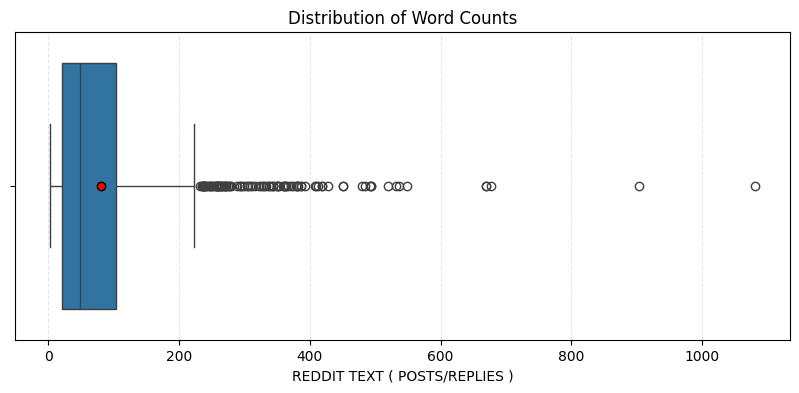

In [83]:
plt.figure(figsize=(10, 4))

sns.boxplot(
    x=df['word_count'], # DATA FROM COLUMN BEING USE FOR DISTRUBUTION
    showmeans=True,     # MEAN INDICATOR
    meanprops={"marker": "o", "markerfacecolor": "red", "markeredgecolor": "black"}
)

plt.xlabel("REDDIT TEXT ( POSTS/REPLIES )")
plt.title("Distribution of Word Counts")
plt.grid(axis="x", linestyle="--", alpha=0.3)
plt.show()

## Frequency-based Analysis

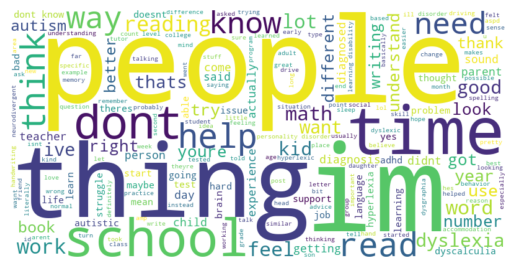

In [84]:
import re # REGRESS EXPRESSION

from collections import Counter
from wordcloud import WordCloud
from gensim.parsing.preprocessing import STOPWORDS # STOP WORD LIST

# Simple Preprocessing
def preprocess(text):
    text = str(text).lower()            # LOWERCASE TEXT
    text = re.sub(r'[^\w\s]', '', text) # REMOVE PUNCTUATION
    return text

# STOP WORDS
stopwords = set(STOPWORDS)

all_words = ' '.join(df['text'].apply(preprocess)).split()
filtered_words = [w for w in all_words if w not in stopwords]

# Top-N Words
top_n = 30
most_common = Counter(filtered_words).most_common(top_n)

# Generate Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(filtered_words))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

## ENGAGEMENT STATISTIC

In [85]:


posts_only = df[df["kind"] == "t3"].copy()
total_posts= len(posts_only)

# MIN - MAX - MEAN
eng_min  = posts_only["num_comments"].min()
eng_max  = posts_only["num_comments"].max()
eng_mean = posts_only["num_comments"].mean()

# PCT ZERO REPLY
none_reply_count = ( posts_only["num_comments"] == 0 ).sum()
pct_none_reply   = ( none_reply_count / total_posts ) * 100 

k = 5  # You can change this number to 10, 20, etc.
top_k_posts = posts_only.nlargest(k, 'num_comments')[['title', 'num_comments', 'author']]

print(f"--- Engagement Summary (Total Posts: {total_posts}) ---")
print(f"Replies per Post -> Min: {eng_min} | Max: {eng_max} | Average: {eng_mean:.2f}")
print(f"Posts with Zero Replies: {none_reply_count:.2f}%")
print(f"\nTop {k} Highly Engaged Posts:")
print(top_k_posts)

--- Engagement Summary (Total Posts: 140) ---
Replies per Post -> Min: 0.0 | Max: 101.0 | Average: 9.50
Posts with Zero Replies: 9.00%

Top 5 Highly Engaged Posts:
                                                  title  num_comments  \
727    Acceptance Has Limits and ASPD Is Where It Stops         101.0   
714   Why are personality disorders so stigmatized i...          57.0   
1058                           Dyscalculia annd Driving          52.0   
1051            Got put into a lower maths class AGAIN.          40.0   
731   Frequently become overstimulated by wife at be...          38.0   

              author  
727     OrbWeaver_99  
714   Buzzythebear33  
1058  Georgian_Shark  
1051  S1LLY_G00B3RXD  
731      chris_socal  


In [93]:
%pip install spacy 
python -m spacy download en_core_web_sm


SyntaxError: invalid syntax (735582558.py, line 2)

In [92]:
import spacy


# 1. Load the English "Brain" (model)
nlp = spacy.load("en_core_web_sm")

# 2. A sample sentence from your Reddit data
text = "I found that ChatGPT and Grammarly are great tools for my daughter's dyslexia."

# 3. Process the text
doc = nlp(text)

# 4. Extract only the "Products" or "Organizations"
print("Research Insights Found:")
for ent in doc.ents:
    if ent.label_ in ["PRODUCT", "ORG"]:
        print(f"Tool Identified: {ent.text} (Category: {ent.label_})")

OSError: [E050] Can't find model 'en_core_web_sm'. It doesn't seem to be a Python package or a valid path to a data directory.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json

# Load the report generated by clean_data.py
with open('test_cleaning.json', 'r') as f:
    report_data = json.load(f)

print("Report Loaded. Files processed:", len(report_data['data']))

Report Loaded. Files processed: 2


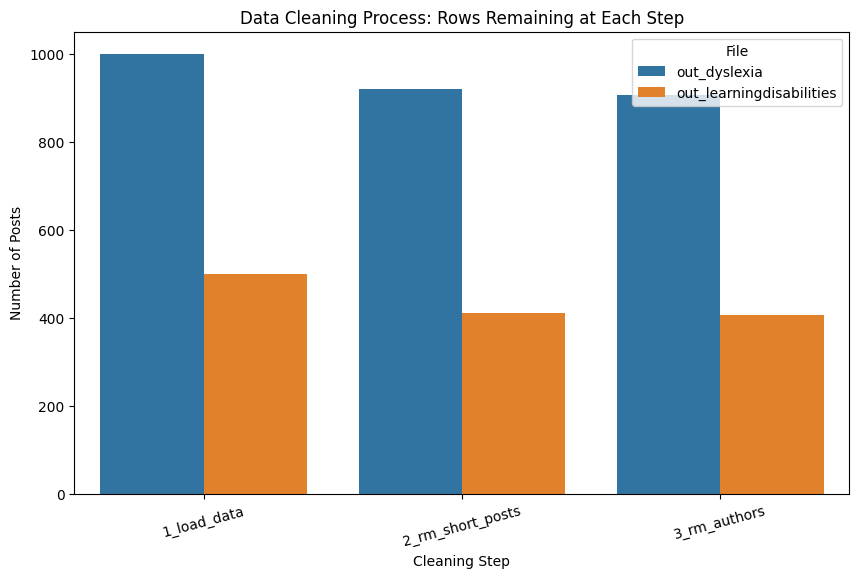

In [3]:
# 1. Flatten the JSON hierarchy into a Pandas DataFrame
history_list = []

for file_item in report_data['data']:
    filename = file_item['file'].replace('.csv', '') # Clean name for chart
    
    for step in file_item['history']:
        history_list.append({
            "File": filename,
            "Step": step['step'],
            "Rows Remaining": step['rows_remaining'],
            "Rows Removed": step['rows_removed']
        })

df_history = pd.DataFrame(history_list)

# 2. Plot the Drop-off
plt.figure(figsize=(10, 6))
sns.barplot(data=df_history, x='Step', y='Rows Remaining', hue='File')

plt.title("Data Cleaning Process: Rows Remaining at Each Step")
plt.ylabel("Number of Posts")
plt.xlabel("Cleaning Step")
plt.xticks(rotation=15)
plt.show()

,File,count,mean,min,max
0,out_dyslexia.csv,905,85.4,15,400
1,out_learningdisabilities.csv,405,72.1,10,250


/var/folders/f2/bjghh7sj42j7jlzkwd5_8br80000gn/T/ipykernel_2133/3346683355.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_stats, x='File', y='mean', palette='viridis')


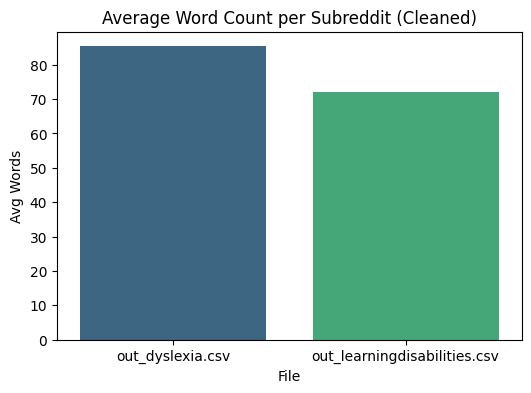

In [4]:
# Extract stats
stats_list = []
for file_item in report_data['data']:
    stats = file_item['final_stats']
    stats['File'] = file_item['file']
    stats_list.append(stats)

df_stats = pd.DataFrame(stats_list)

# Display table
display(df_stats[['File', 'count', 'mean', 'min', 'max']])

# Visual comparison of average length
plt.figure(figsize=(6, 4))
sns.barplot(data=df_stats, x='File', y='mean', palette='viridis')
plt.title("Average Word Count per Subreddit (Cleaned)")
plt.ylabel("Avg Words")
plt.show()